In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier

from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt

import csv
from sklearn.feature_selection import SelectFromModel

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [3]:
X = pd.read_csv('./data/nba/X_train.csv')
y_train = pd.read_csv('./data/nba/y_train.csv')

X_test = pd.read_csv('./data/nba/X_test.csv')

In [4]:
def pd2np(df):
    return df.as_matrix()
X_train = pd2np(X)
y_train = pd2np(y_train)

X_test = pd2np(X_test)

## Data Preprocessing

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

## Training

### Perceptron

In [7]:

# max_iter : The maximum number of passes over the training data
# eta0 : learning rate

for a in [0, 1, 10, 100, 1000]:
    ppn = Perceptron(penalty='l2', alpha=a, max_iter=10, eta0=0.1, random_state=0)
    ppn.fit(X_train, y_train)
    
    y_train_pred = ppn.predict(X_train)
    y_valid_pred = ppn.predict(X_valid)
    
    print('\n[Alpha = %d]' % a )
    print('MSE train: %.2f, valid: %.2f' % (
                    mean_squared_error(y_train, y_train_pred),
                    mean_squared_error(y_valid, y_valid_pred)))
    print('Accuracy train: %.2f, Accuracy valid: %.2f' % (
                    accuracy_score(y_train, y_train_pred),
                    accuracy_score(y_valid, y_valid_pred)))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[Alpha = 0]
MSE train: 0.47, valid: 0.47
Accuracy train: 0.53, Accuracy valid: 0.53

[Alpha = 1]
MSE train: 0.47, valid: 0.47
Accuracy train: 0.53, Accuracy valid: 0.53

[Alpha = 10]
MSE train: 0.54, valid: 0.55
Accuracy train: 0.46, Accuracy valid: 0.45

[Alpha = 100]
MSE train: 0.54, valid: 0.55
Accuracy train: 0.46, Accuracy valid: 0.45

[Alpha = 1000]
MSE train: 0.54, valid: 0.55
Accuracy train: 0.46, Accuracy valid: 0.45


### Ridge Regression

In [8]:


#poly = PolynomialFeatures(degree=3)
#X_poly = poly.fit_transform(X_train)

for a in [0, 1, 10, 100, 1000]:
    lr_rg = RidgeClassifier(alpha=a)
    lr_rg.fit(X_train, y_train)

    y_train_pred = lr_rg.predict(X_train)
    y_valid_pred = lr_rg.predict(X_valid)

    print('\n[Alpha = %d]' % a )
    print('MSE train: %.2f, valid: %.2f' % (
                    mean_squared_error(y_train, y_train_pred),
                    mean_squared_error(y_valid, y_valid_pred)))
    print('Accuracy train: %.2f, Accuracy valid: %.2f' % (
                    accuracy_score(y_train, y_train_pred),
                    accuracy_score(y_valid, y_valid_pred)))


[Alpha = 0]
MSE train: 0.39, valid: 0.39
Accuracy train: 0.61, Accuracy valid: 0.61

[Alpha = 1]
MSE train: 0.39, valid: 0.39
Accuracy train: 0.61, Accuracy valid: 0.61

[Alpha = 10]
MSE train: 0.39, valid: 0.39
Accuracy train: 0.61, Accuracy valid: 0.61

[Alpha = 100]
MSE train: 0.39, valid: 0.39
Accuracy train: 0.61, Accuracy valid: 0.61

[Alpha = 1000]
MSE train: 0.39, valid: 0.39
Accuracy train: 0.61, Accuracy valid: 0.61


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:810: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
from sklearn.ensemble import RandomForestClassifier

# criterion : impurity function
# n_estimators :  number of decision trees
# random_state : seed used by the random number generator
# n_jobs : number of cores for parallelism
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=2000, 
                                max_depth=6,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_valid_pred = forest.predict(X_valid)
print('Accuracy (forest) train: %.2f' % accuracy_score(y_train, y_train_pred))
print('Accuracy (forest) valid: %.2f' % accuracy_score(y_valid, y_valid_pred))


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Accuracy (forest) train: 0.62
Accuracy (forest) valid: 0.62


## Find top-3 feature using the most important feature find in the random forest

top3 feature : SHOT_DIST, CLOSE_DEF_DIST, PTS_TYPE

In [10]:
importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

 1) SHOT_DIST                      0.453415
 2) CLOSE_DEF_DIST                 0.144639
 3) PTS_TYPE                       0.104642
 4) SHOT_CLOCK                     0.103402
 5) TOUCH_TIME                     0.100668
 6) GAME_CLOCK                     0.045885
 7) DRIBBLES                       0.038395
 8) PERIOD                         0.008955


### SGD Classifier 

In [11]:

for a in [1, 10, 100, 1000]:
    # penalty is defailt to l2 Regularization
    sgd = SGDClassifier(alpha=a)
    sgd.fit(X_train, y_train)
    
    y_train_pred = sgd.predict(X_train)
    y_valid_pred = sgd.predict(X_valid)
    
    print('\n[Alpha = %d]' % a )
    print('MSE train: %.2f, valid: %.2f' % (
                    mean_squared_error(y_train, y_train_pred),
                    mean_squared_error(y_valid, y_valid_pred)))
    print('Accuracy train: %.2f, Accuracy valid: %.2f' % (
                    accuracy_score(y_train, y_train_pred),
                    accuracy_score(y_valid, y_valid_pred)))


[Alpha = 1]
MSE train: 0.40, valid: 0.40
Accuracy train: 0.60, Accuracy valid: 0.60

[Alpha = 10]
MSE train: 0.46, valid: 0.45
Accuracy train: 0.54, Accuracy valid: 0.55

[Alpha = 100]
MSE train: 0.46, valid: 0.45
Accuracy train: 0.54, Accuracy valid: 0.55

[Alpha = 1000]
MSE train: 0.54, valid: 0.55
Accuracy train: 0.46, Accuracy valid: 0.45


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Learning Curve

In [12]:
# learning curve of random forest

def score(model, X, y):
    return accuracy_score(model.predict(X), y)

train_sizes, train_scores, test_scores = learning_curve(estimator=forest, X=X_train, y=y_train.reshape(y_train.shape[0]), scoring=score)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



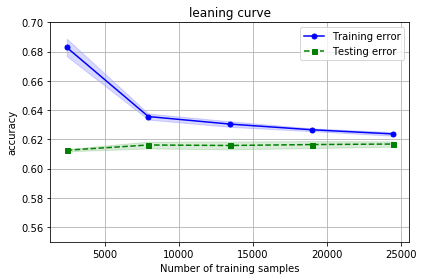

In [13]:
plt.plot(train_sizes, train_mean,
    color='blue', marker='o',
    markersize=5,
    label='Training error')
plt.fill_between(train_sizes,
    train_mean+train_std,
    train_mean-train_std,
    alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=5,
    label='Testing error')
plt.fill_between(train_sizes,
    test_mean+test_std,
    test_mean-test_std,
    alpha=0.15, color='green')

# plt.hlines(y=1, xmin=500, xmax=25000, color='red', linewidth=2, linestyle='--')

plt.title('leaning curve')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('accuracy')
plt.legend(loc='upper right')
plt.ylim([0.55, 0.7])
plt.tight_layout()
plt.savefig('./output/fig-learning-curve.png', dpi=300)
plt.show()

### Train again with only the important feature

In [14]:
# put prefitted RandomForestClassifier "forest" into SelectFromModel
sfm = SelectFromModel(forest, threshold=0.104)
sfm.fit(X_train, y_train)
Z_forest_alt = sfm.transform(X_train)

for f in range(Z_forest_alt.shape[1]): #mdf
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/from_model.py:169: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


 1) SHOT_DIST                      0.453415
 2) CLOSE_DEF_DIST                 0.144639
 3) PTS_TYPE                       0.104642


In [15]:
forest.fit(Z_forest_alt, y_train)
X_valid = sfm.transform(X_valid)

y_pred = forest.predict(X_valid)

print('Accuracy: %.2f' % accuracy_score(y_valid, y_pred))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy: 0.62


In [16]:

X_test = sfm.transform(X_test)
y_pred = forest.predict(X_test)

y_pred = y_pred.reshape(y_pred.shape[0],1)
with open('y_pred.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(y_pred)